# Desafio para estágio em Análise de Dados na Linx
Para a realização do desafio primeiramente foi importada a biblioteca pandas, baixados os arquivos disponibilizados e feita a leitura dos json's.

In [95]:
# usando biblioteca pandas

import pandas as pd
import numpy as np

# data frames:
frame_off_sales = pd.read_json('offline_sales.json', lines = True)
frame_on_orders = pd.read_json('online_orders.json', lines = True)
frame_on_pageviews = pd.read_json('online_pageviews.json', lines = True)

## 1. Qual foi o faturamento total no período?

In [107]:
total = 0
tot_compras = 0
# offline sales
for i in range(len(frame_off_sales['price'])):
    total += frame_off_sales['price'][i] * frame_off_sales['quantity'][i]
    tot_compras += 1

#print(total/tot_compras)
# online orders
for i in range(len(frame_on_orders['price'])):
    total += frame_on_orders['price'][i] * frame_on_orders['quantity'][i]
    tot_compras += 1

print("faturamento total: %.2f" % total)
#frame_on_orders.describe()
#frame_off_sales.describe()

faturamento total: 19552328.32


### 1. Resposta
levando em conta o faturamento através de vendas offline e requisições online, o faturamento total do período foi 13.903.005,31 R$.

## 2. Qual o produto mais comprado online?

In [105]:
prod_id = 0
total_compras = 0
hmap = {}

for i in range(len(frame_on_orders['date'])):
    if frame_on_orders['on_product_id'][i] not in hmap:
        hmap[frame_on_orders['on_product_id'][i]] = 0
    for j in range(frame_on_orders['quantity'][i]):
        aux = hmap[frame_on_orders['on_product_id'][i]]
        hmap[frame_on_orders['on_product_id'][i]] = aux + 1

for i, j in hmap.items():
    if j > total_compras:
        prod_id = i
        total_compras = j

print("id do produto mais vendido online: %d" % prod_id)

id do produto mais vendido online: 626664333563363


### 2. Resposta
O id do produto mais comprado online é 626664333563363

## 3. Cariocas gostam de comprar no fim de semana?
Para responder essa pergunta, é necessario comparar a quantidade de vendas no final de semana com os demais dias, para tal será somente avaliado o volume de vendas offline.

In [65]:
# total de produtos vendidos e faturamento no RJ

faturamento = [0, 0, 0, 0, 0, 0, 0]
vendas = [0, 0, 0, 0, 0, 0, 0]
fat_dias = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dias = ['seg', 'ter', 'qua', 'qui', 'sex', 'sab', 'dom']

for i in range(len(frame_off_sales['date'])):
    if frame_off_sales['state'][i] == 'RJ':
        dia = frame_off_sales['date'][i].day
        fat_dias[dia - 1] += frame_off_sales['quantity'][i] * frame_off_sales['price'][i]
        if dia % 7 == 6:#segunda
            faturamento[0] += frame_off_sales['quantity'][i] * frame_off_sales['price'][i]
            vendas[0] += frame_off_sales['quantity'][i]
        if dia % 7 == 0:#terça
            faturamento[1] += frame_off_sales['quantity'][i] * frame_off_sales['price'][i]
            vendas[1] += frame_off_sales['quantity'][i]
        if dia % 7 == 1:#quarta
            faturamento[2] += frame_off_sales['quantity'][i] * frame_off_sales['price'][i]
            vendas[2] += frame_off_sales['quantity'][i]
        if dia % 7 == 2:
            faturamento[3] += frame_off_sales['quantity'][i] * frame_off_sales['price'][i]
            vendas[3] += frame_off_sales['quantity'][i]
        if dia % 7 == 3:
            faturamento[4] += frame_off_sales['quantity'][i] * frame_off_sales['price'][i]
            vendas[4] += frame_off_sales['quantity'][i]
        if dia % 7 == 4:
            faturamento[5] += frame_off_sales['quantity'][i] * frame_off_sales['price'][i]
            vendas[5] += frame_off_sales['quantity'][i]
        if dia % 7 == 5:
            faturamento[6] += frame_off_sales['quantity'][i] * frame_off_sales['price'][i]
            vendas[6] += frame_off_sales['quantity'][i]

tot = 0
for i in range(7):
    tot += faturamento[i]
    if i > 1 and i < 5:
        med = faturamento[i] / 5
    else:
        med = faturamento[i] / 4
    print("faturamento de %s: %.2f, média de faturamento neste dia da semana: %.2f" % (dias[i], faturamento[i], med))
    
print("média de faturamento diário: %.2f" % (tot/31))
# total de produtos vendidos no fim de semana no RJ

# total de produtos vendidos em outros estados

# total de produtos vendidos durante o fim de semana em outros estados

faturamento de seg: 542478.08, média de faturamento neste dia da semana: 135619.52
faturamento de ter: 835704.12, média de faturamento neste dia da semana: 208926.03
faturamento de qua: 984666.13, média de faturamento neste dia da semana: 196933.23
faturamento de qui: 1321095.48, média de faturamento neste dia da semana: 264219.10
faturamento de sex: 1465987.11, média de faturamento neste dia da semana: 293197.42
faturamento de sab: 955910.58, média de faturamento neste dia da semana: 238977.64
faturamento de dom: 151577.00, média de faturamento neste dia da semana: 37894.25
média de faturamento diário: 201852.21


<BarContainer object of 31 artists>

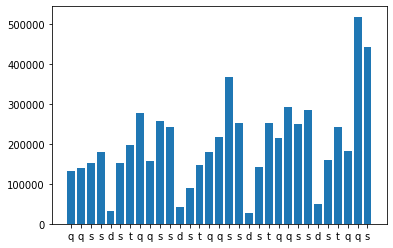

In [62]:
# gráfico para visualizar consumo por dia da semana

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1, 31, 31)
dias_p = ['q', 'q', 's', 's', 'd', 's', 't', 'q', 'q', 's', 's', 'd', 's', 't', 'q', 'q', 's', 's', 'd', 's', 't', 'q', 'q', 's', 's', 'd', 's', 't', 'q', 'q', 's', 's']
plt.xticks(x, dias_p)
plt.bar(x, fat_dias)



### 3. Resposta
Como é possível notar, a partir do gráfico de consumo diário dos cariocas e consumo total no espaço amostral, estes tenderam a consumir mais nos últimos dias da semana (quinta, sexta e sábado, pois ficaram acima da média diária de faturamento), entretanto o nível de consumo foi o menor de todos, em média, no domingo. É possível afirmar que o carioca apresenta um aumento de consumo nos dias finais da semana, e um declínio acentuado no domingo. Este baixo movimento no domingo é esperado em lojas físicas.

## 4. É comum escolher online e terminar a compra na loja física?
Para fazer tal análise, será utilizado o costumer_id do cliente, relacionando uma compra offline ao tal id de um cliente, buscando no arquivo online_pageviews se este consumidor viu um produto online (caso este e tenha realizado uma compra online no mesmo dia, não deverá ser contabilizado na categoria "escolheu online e terminou compra em loja física"). Como são muitos dados no arquivo "online_pageviews.json" alguns critérios de exclusão devem ser utilizados para melhora de desempenho. No caso em questão, pode-se excluir todas as visitas à página online que não tenham pageType = product e customer_id = null.
      

In [50]:
# limpando dados.reset_index(drop=True)
pageviews_database = frame_on_pageviews[frame_on_pageviews['pageType'] == 'product']
pageviews_database = pageviews_database[np.isfinite(pageviews_database['customer_id'])]  # se tem algum NaN exclui
pageviews_database.reset_index(drop=True, inplace=True)

offsales_database = frame_off_sales[np.isfinite(frame_off_sales['customer_id'])]
offsales_database.reset_index(drop = True, inplace=True)
pct_offsales_with_customerId = len(offsales_database['date'])/len(frame_off_sales['date']) * 100
pct_offsales_with_customerId

onorders_database = frame_on_orders[np.isfinite(frame_off_sales['customer_id'])]
onorders_database.reset_index(drop = True, inplace=True)
#offsales_database

# calculo 
total = 0
for i in range(len(offsales_database['date'])):
    customer = offsales_database['customer_id'][i]
    date = offsales_database['date'][i]
    matches = pageviews_database[pageviews_database['customer_id'] == customer]
    matches.reset_index(drop = True, inplace=True)
    
    
    #online_matches = onorders_database['date'][onorders_database['customer_id'] == customer]
    #online_matches = online_matches[online_matches.day == 
    #online_matches.reset_index(drop = True, inplace=True)
    for j in range(len(matches)):
        online_matches = onorders_database[matches['date'][j] == onorders_database['date']]
        online_matches.reset_index(drop = True, inplace=True)
        online_matches = online_matches[online_matches['customer_id'][j] == onorders_database['customer_id']]
        
        if not online_matches.empty:
            break
        if matches['date'][j].day < offsales_database['date'][i].day:
            total += offsales_database['quantity'][i]
            break
    
pct_total = total/len(offsales_database['date']) * 100

C:\Users\klaus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\klaus\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [103]:
print("porcentagem de compras offline que o cliente possuia client_id: %.2f" % pct_offsales_with_customerId)

porcentagem de compras offline que o cliente possuia client_id: 87.99


In [104]:
print("porcentagem de compras físicas realizadas escolhendo online e terminando a compra em loja física:  %.2f" % pct_total)

porcentagem de compras físicas realizadas escolhendo online e terminando a compra em loja física: 0.68


### 4. Resposta
Utilizando os critérios anteriormente discutidos, e avaliando que aproximadamente 88% dos clientes que compraram offline possuem um client_id (uma quantidade bem expressiva), nota-se que escolher um produto online e terminar a compra em uma loja física não é uma prática tão comum, visto que apenas 175 compras foram realizadas de tal modo, ou 0,7% das vendas físicas totais.

## 5. O time de marketing desta rede quer fazer uma campanha oferecendo um cupom de 20% nas compras de loja física para quem visitou o site e abandonou um carrinho com produtos. Estime o resultado dessa campanha.
Para esta análise, será considerado que um visitante só recebe um cupom de desconto se seu 'visitor_id' está no arquivo online_pageviews.json, o mesmo id de visitante não está no arquivo online_orders.json e este acessou um pageType = 'cart', isto significa que o visitante abandonou um carrinho com itens. Para esta análise, será considerado que para o cliente ter acessado a página do carrinho ele tinha algum produto neste.

In [99]:
# linmpando dados
cart_database = frame_on_pageviews[frame_on_pageviews['pageType'] == 'cart']  # acessos a pagina cart
cart_database.reset_index(drop=True, inplace=True)
hmap_visitante_compras = {}
hmap_visitante_onCart = {}
for i in range(len(cart_database['date'])):
    if cart_database['visitor_id'][i] not in hmap_visitante_onCart:
        hmap_visitante_onCart[cart_database['visitor_id'][i]] = 0
    hmap_visitante_onCart[cart_database['visitor_id'][i]] = hmap_visitante_onCart[cart_database['visitor_id'][i]] + 1 
    
for i in range(len(frame_on_orders['date'])):
    hmap_visitante_compras.setdefault(frame_on_orders['visitor_id'][i], []).append(frame_on_orders['order_id'][i])
    
# agora tenho quantas vezes um visitante esteve no carrinho e quantas vezes um visitante comprou

cupons = 0
for i, j in hmap_visitante_onCart.items():
    if i not in hmap_visitante_compras:
        cupons += 1
        
print("total de cupons distribuidos: %s" % cupons)

total de cupons distribuidos: 7694


### 5. Resposta
Um número considerável de clientes receberá um cupom, se supormos que 20% das pessoas que receberam um cupom irão numa loja física comprar um produto usando o desconto.

$$faturamentoCampanha(x) = valorMedioCompraOffline * 20/100 * x * 80/100$$

com x sendo quantidade de pessoas que receberam o cupom, logo 7694, o valor arrecadado é aproximadamente 580.000 R$, contribuindo em aproximadamente 4% das vendas offline.    

## 6. Bônus. O que mais de interessante tem nestes dados?
### 6.1. Qual é a plataforma mais utilizada nas vendas online e qual é a porcentagem de compra por acesso em cada plataforma?
Os acessos online serão simplificados para acessos a paginas relacionadas a produtos.


In [73]:
# 6.1
dic_plataforma_compras = {'desktop':0, 'mobile':0}
dic_plataforma_acessos = {'desktop':0, 'mobile':0}

for i in range(len(frame_on_orders['date'])):
    if frame_on_orders['deviceType'][i] not in dic_plataforma_compras:
        dic_plataforma_compras[frame_on_orders['deviceType'][i]] = 0
    dic_plataforma_compras[frame_on_orders['deviceType'][i]] += 1

# limpando dados
acessos = frame_on_pageviews[frame_on_pageviews['pageType'] == 'product']  # acessos a home
acessos.reset_index(drop=True, inplace=True)

for i in range(len(acessos['date'])):
    dic_plataforma_acessos[acessos['deviceType'][i]] += 1
    
dic_plataforma_acessos

{'desktop': 565650, 'mobile': 850203}

In [74]:
dic_plataforma_compras # total acessos 1.415.853‬
                       # total compras 12.237‬ 

{'desktop': 5266, 'mobile': 6971}

### 6. Resposta
#### 6.1
aproximadamente 40% dos acessos a páginas relacionadas a produtos foram em desktop e 43% das vendas online foram representadas por usuários em desktop, isso indica um balanceamento bom entre as plataformas, um desbalanceamento mais elevado poderia ser causado por alguma escolha de design de alguma plataforma inconveniente para o usuário. O leve desbalanceamento pode ser em conta da facilidade de acesso em dispositivos móveis e o usuário só utilizar o desktop para efetivamente realizar compras e não tanto para escolher.
por volta de 9,3% dos acessos a produto são convertidos em compra nos desktops, enquanto 8,1% dos acessos em dispositivos móveis são convertidos em compras.